In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import PIL
from keras.preprocessing import image
import urllib

import matplotlib.image as mpimg
from PIL import Image


2022-04-07 13:46:09.810513: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-07 13:46:09.810615: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dictionary = {'paths_no_mask':[], 'path_img_masque': []}
mask = []
no_mask = []
columns = []


files_no_mask = os.listdir('/home/baumont/Documents/git/projet-3-groupe-2/Incorrect/')
files_mask = os.listdir('/home/baumont/Documents/git/projet-3-groupe-2/Correct/')

i = 0

for i in range (224*224):
    columns.append(f"px{i+1}")

for name in files_no_mask:
    i += 1
    dictionary['paths_no_mask'].append('/home/baumont/Documents/git/projet-3-groupe-2/Incorrect/' + name)
    img = Image.open(f'/home/baumont/Documents/git/projet-3-groupe-2/Incorrect/{name}').convert("L")
    pix = np.reshape(np.array(img, dtype='uint16'),(224*224))
    no_mask.append(pix)

for name in files_mask:
    i += 1
    dictionary['path_img_masque'].append('/home/baumont/Documents/git/projet-3-groupe-2/Correct/' + name)
    img = Image.open(f'/home/baumont/Documents/git/projet-3-groupe-2/Correct/{name}').convert("L")
    pix =  np.reshape(np.array(img, dtype='uint16'),(224*224))
    mask.append(pix)

df1 = pd.DataFrame(no_mask, columns=columns)
df2 = pd.DataFrame(mask, columns=columns)

df1['values'] = 0
df2['values'] = 1

df = pd.concat([df1, df2])
df = df.rename(columns={0: 'image path'})
df

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px50168,px50169,px50170,px50171,px50172,px50173,px50174,px50175,px50176,values
0,123,123,124,124,124,124,124,124,125,125,...,158,157,158,158,158,158,158,158,158,0
1,124,123,123,123,123,123,123,123,125,125,...,175,171,166,159,153,147,147,155,165,0
2,157,157,157,157,156,156,156,156,157,156,...,43,45,44,42,40,38,38,40,43,0
3,151,151,151,151,151,151,151,151,152,152,...,37,37,46,44,45,51,50,53,60,0
4,151,151,151,151,151,150,150,150,150,150,...,182,182,183,183,183,182,182,183,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,147,147,147,147,147,147,148,148,146,146,...,35,37,37,36,36,36,37,38,39,1
306,160,160,160,160,160,160,160,160,160,159,...,40,42,42,48,52,51,51,52,51,1
307,122,123,124,125,125,124,123,122,124,124,...,137,149,149,149,148,148,149,149,149,1
308,146,146,146,146,146,146,145,145,144,145,...,51,51,52,51,47,43,37,32,33,1


In [3]:
df_sampled = df.sample(frac=1)
df_sampled

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px50168,px50169,px50170,px50171,px50172,px50173,px50174,px50175,px50176,values
59,124,124,124,124,124,124,124,124,124,124,...,156,157,158,158,158,158,158,158,158,0
51,157,157,157,156,156,156,157,158,158,158,...,38,40,41,43,44,44,44,44,45,0
132,154,154,154,153,153,153,153,153,153,153,...,37,37,39,42,42,38,35,36,40,1
150,146,146,147,146,145,145,145,146,146,145,...,73,64,58,53,54,56,60,65,70,1
182,159,159,158,157,156,156,158,159,159,158,...,49,46,45,47,52,58,59,57,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,127,126,125,125,125,125,124,123,125,125,...,156,158,158,157,157,157,158,158,159,0
296,125,125,124,123,123,123,123,123,123,123,...,158,158,158,158,158,158,159,159,159,1
92,157,158,158,157,156,157,158,157,158,158,...,39,39,37,39,44,47,47,49,52,1
69,157,157,157,156,156,156,157,158,158,158,...,38,40,41,43,44,44,44,44,45,0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier



In [5]:
X = df_sampled.drop(columns=['values'])
y =df_sampled['values']
X

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px50167,px50168,px50169,px50170,px50171,px50172,px50173,px50174,px50175,px50176
59,124,124,124,124,124,124,124,124,124,124,...,157,156,157,158,158,158,158,158,158,158
51,157,157,157,156,156,156,157,158,158,158,...,40,38,40,41,43,44,44,44,44,45
132,154,154,154,153,153,153,153,153,153,153,...,39,37,37,39,42,42,38,35,36,40
150,146,146,147,146,145,145,145,146,146,145,...,78,73,64,58,53,54,56,60,65,70
182,159,159,158,157,156,156,158,159,159,158,...,50,49,46,45,47,52,58,59,57,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,127,126,125,125,125,125,124,123,125,125,...,156,156,158,158,157,157,157,158,158,159
296,125,125,124,123,123,123,123,123,123,123,...,158,158,158,158,158,158,158,159,159,159
92,157,158,158,157,156,157,158,157,158,158,...,39,39,39,37,39,44,47,47,49,52
69,157,157,157,156,156,156,157,158,158,158,...,40,38,40,41,43,44,44,44,44,45


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
RF = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=0).fit(X_train, y_train)
pred = RF.predict(X_test)
print("score train : ",RF.score(X_train, y_train))
print("score test : ",RF.score(X_test, y_test))

score train :  1.0
score test :  0.9560975609756097


In [7]:
pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1])

In [8]:
y_test

92     0
96     1
273    1
302    0
5      0
      ..
190    1
85     1
230    0
231    0
168    1
Name: values, Length: 205, dtype: int64

In [9]:
# plt.imshow(np.reshape(np.array(X_test.iloc[135]),(224,224)))

In [10]:
np.where(pred != y_test)

(array([ 17,  21,  49,  76, 110, 121, 191, 192, 196]),)

In [12]:
##plt.figure(figsize=(12, 10))
#for i in range(6):
    #idx = np.where(y_test != pred)[0][i]
    #ax = plt.subplot(3, 4, i + 1)
   # plt.imshow(np.reshape(np.array(X_test.iloc[34]),(224,224)))
    #plt.imshow(X_test.iloc[idx](np.reshape[224,224]))
    #plt.title(f"predicted: {[pred[idx]]}\ntrue: {[y_test[idx]]}")
    #plt.axis("off")

In [13]:
##plt.figure(figsize=(12, 10))
#for i in range(10):
    #idx = np.where(y_test != pred)[0][i]
    #ax = plt.subplot(3, 4, i + 1)
    #plt.imshow(np.reshape(np.array(X_test.loc[idx])),(224,224))
    #plt.title(f"predicted: {[pred[idx]]}\ntrue: {[y_test[idx]]}")
    #plt.axis("off")

resultat detection du mask model RF


<AxesSubplot:>

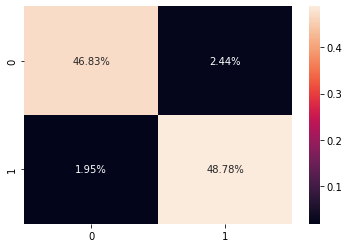

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

print("resultat detection du mask model RF")
cm = confusion_matrix(y_test, RF.predict(X_test))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

In [15]:
print(classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       101
           1       0.95      0.96      0.96       104

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [18]:
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)

print('Score train svm ',SVM.score(X_train, y_train))
print('Score test svm ',SVM.score(X_test, y_test))

Score train svm  0.9012048192771084
Score test svm  0.8


resultat detection du mask model SVM


<AxesSubplot:>

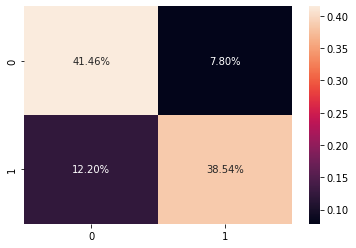

In [19]:
print("resultat detection du mask model SVM")
cm = confusion_matrix(y_test, SVM.predict(X_test))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')



In [20]:
print(confusion_matrix(y_test, SVM.predict(X_test)))
print(classification_report(y_test, SVM.predict(X_test)))

[[85 16]
 [25 79]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       101
           1       0.83      0.76      0.79       104

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [24]:
NN = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print('score train', NN.score(X_train, y_train))
print('score test Nn', NN.score(X_test, y_test), 4)

score train 0.4963855421686747
score test Nn 0.5073170731707317 4


resultat detection du mask model MLPClassifier


<AxesSubplot:>

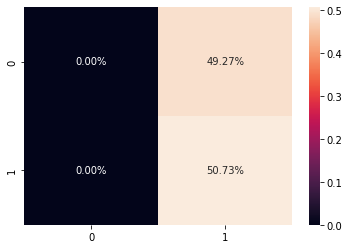

In [25]:
print("resultat detection du mask model MLPClassifier")
cm = confusion_matrix(y_test, NN.predict(X_test))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')



In [26]:
print(confusion_matrix(y_test, NN.predict(X_test)))
print(classification_report(y_test, NN.predict(X_test)))

[[  0 101]
 [  0 104]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.51      1.00      0.67       104

    accuracy                           0.51       205
   macro avg       0.25      0.50      0.34       205
weighted avg       0.26      0.51      0.34       205



/home/baumont/.local/share/virtualenvs/projet-3-groupe-2-NxwoS5ta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/baumont/.local/share/virtualenvs/projet-3-groupe-2-NxwoS5ta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/baumont/.local/share/virtualenvs/projet-3-groupe-2-NxwoS5ta/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div